In [3]:
import os
import base64
import requests
import random
import subprocess
import time

from IPython.display import display, Image

ENDPOINT_ID = "563970300211888128"
PROJECT_ID = "vision-ml-first-test"

# This is cheating!!! Instead create an access key and store it in a key store!!!
GCLOUD_ACCESS_TOKEN = subprocess.check_output("gcloud auth print-access-token", shell=True).strip()

HEADERS = {'Authorization': "Bearer " + GCLOUD_ACCESS_TOKEN, 'Content-Type': 'application/json'}

END_POINT = "https://us-central1-prediction-aiplatform.googleapis.com/v1alpha1/projects/" + \
            PROJECT_ID + \
            "/locations/us-central1/endpoints/" + \
            ENDPOINT_ID + ":predict"

image_dir = "images"
IMAGE_COUNT = 10

REQ_TEMPLATE = '{ \
  "instances": [{ \
    "content": "REQUEST_DATA" \
  }], \
  "parameters": { \
    "confidenceThreshold": 0.5, \
    "maxPredictions": 5\
  }\
}'


Cat Cat Confidence = 0.993930697 Took 0.427 Seconds


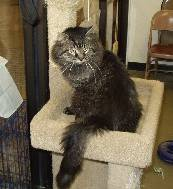

Dog Dog Confidence = 0.99420172 Took 0.489 Seconds


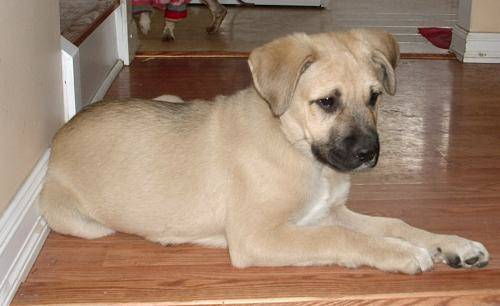

Cat Cat Confidence = 0.999259055 Took 0.503 Seconds


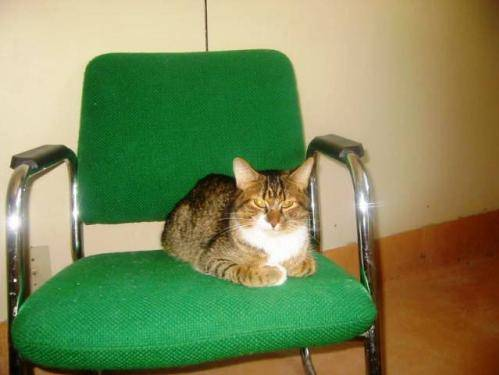

Dog Dog Confidence = 0.956641674 Took 0.463 Seconds


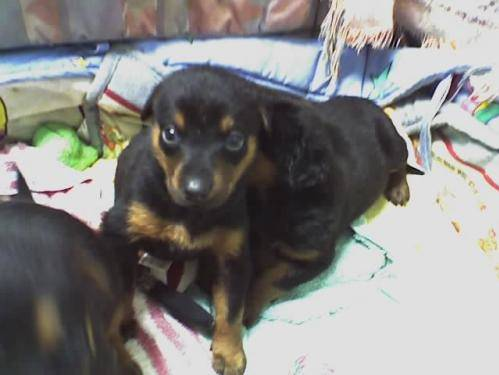

Dog Dog Confidence = 0.859783 Took 0.440 Seconds


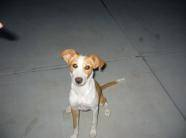

Cat Cat Confidence = 0.988126159 Took 0.471 Seconds


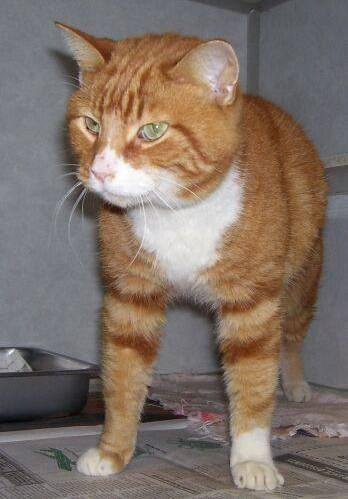

Dog Dog Confidence = 0.996899247 Took 0.536 Seconds


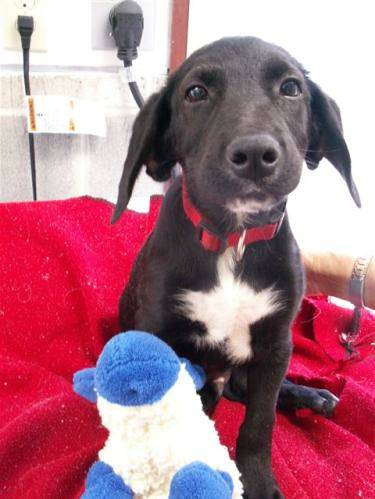

Cat Cat Confidence = 0.929323673 Took 0.501 Seconds


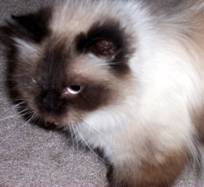

Cat Cat Confidence = 0.985874534 Took 0.506 Seconds


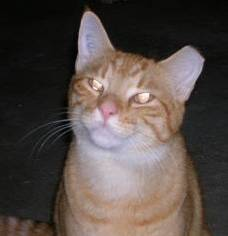

Dog Dog Confidence = 0.999804556 Took 0.502 Seconds


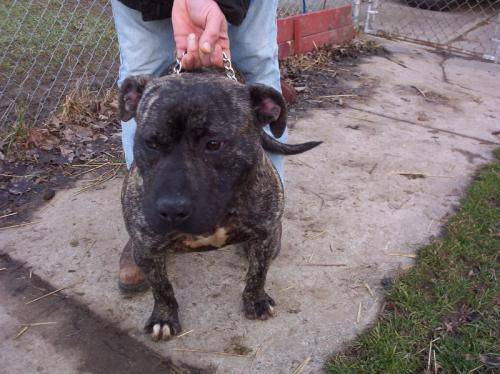

In [7]:
# Array for collecting stats

counts={"Dog":{"Dog":0, "Cat":0}, "Cat":{"Dog":0, "Cat":0}}

# Find the files
files_all = os.listdir(image_dir)
files_sample = random.sample(files_all, IMAGE_COUNT)

for file_name in files_sample:
    
    # Get the image data
    full_file_name = image_dir + "/" + file_name
    in_file = open(full_file_name)
    file_data = in_file.read()
    in_file.close()
    
    # Encode and create request
    file_base64_string = base64 \
                .b64encode(file_data) \
                .decode('ascii')
    req_data = REQ_TEMPLATE.replace("REQUEST_DATA", file_base64_string)
    
    # Call the Google API and time it
    start_time = time.time()
    resp = requests.post(END_POINT, data=req_data, headers=HEADERS)
    end_time = time.time()
    resp.raise_for_status()
    
    # Pull out the response data and print it
    prediction = resp.json()["predictions"][0]
    predicted_label = prediction["displayNames"][0]
    confidence = prediction["confidences"][0]
    actual_label = file_name[0:3].capitalize()
    
    print actual_label, predicted_label, \
           "Confidence =",confidence, \
           "Took", '{:5.3f}'.format(end_time - start_time), "Seconds"
    counts[actual_label][predicted_label] += 1
    
    #Show the image
    display(Image(full_file_name))

In [8]:
print counts

{'Dog': {'Dog': 5, 'Cat': 0}, 'Cat': {'Dog': 0, 'Cat': 5}}
